## Analysis of Fine Tuning Runs

Analysis and charts to interpret the output from the second run to fine tune - this time with balanced training data 


In [1]:
###  Add mathematical libraries
import numpy as np
import pandas as pd

# Graphical libraries and items.
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, draw


import re
# import json
# import datetime
# import string


In [2]:
## Read file into Pandas Data array

file_loc = "./runs2bal.log"

df = pd.read_csv(file_loc, sep='|', skiprows=(), header=(0))

df.columns

Index(['timestamp', 'max_len', 'epochs', 'batch_size', 'embed_dim',
       'num_filters', 'kernel_sizes', 'dense_layer_dims', 'dropout_rate',
       'loss', 'loss-0', 'loss-1', 'loss-2', 'loss-3', 'loss-4', 'loss-5',
       'loss-6', 'loss-7', 'loss-8', 'loss-9', 'loss-10', 'loss-11', 'loss-12',
       'loss-13', 'loss-14', 'loss-15', 'loss-16', 'loss-17', 'loss-18',
       'loss-19', 'accuracy', 'accuracy-0', 'accuracy-1', 'accuracy-2',
       'accuracy-3', 'accuracy-4', 'accuracy-5', 'accuracy-6', 'accuracy-7',
       'accuracy-8', 'accuracy-9', 'accuracy-10', 'accuracy-11', 'accuracy-12',
       'accuracy-13', 'accuracy-14', 'accuracy-15', 'accuracy-16',
       'accuracy-17', 'accuracy-18', 'accuracy-19', 'val_loss', 'val_loss-0',
       'val_loss-1', 'val_loss-2', 'val_loss-3', 'val_loss-4', 'val_loss-5',
       'val_loss-6', 'val_loss-7', 'val_loss-8', 'val_loss-9', 'val_loss-10',
       'val_loss-11', 'val_loss-12', 'val_loss-13', 'val_loss-14',
       'val_loss-15', 'val_loss-16

In [3]:
### Find max accuracy and min loss on training and
### validation sets, and which epoch it was achieved on
### This will let us see both the most accurate runs
### and let us detect if (a) convergence has occurred
### and (b) whether we have overfit the model

epochs = 20  #output columns are counted from 0

### Metrics are tuples of the metric name and + or -1
### depending whether low or high numbers are best

for metric in [ ('loss', -1), ('accuracy',1), ('val_loss',-1), ('val_accuracy',1)]:
    best_val     = f"{metric[0]}-best"
    best_epc = f"{metric[0]}-epoch"
    met_sign     = metric[1]
    
    # Create list of the column names we want to check for the metric
    metric_cols  = [ f"{metric[0]}-{epoch}" for epoch in range(0,epochs) ]
   

    # for some reason, pd.read_csv is interpreting 


    # Find the best value for each metric, as well as the epoch in which it occurred
    #
    # idxmax(axis=1) returns the column name with the maximum value, idxmin does
    # the sames for the minimum
    #
    # The str.extract() turns the values into strings and then pulls out only digits
    # Ordinarily this would also pull separators like "," and "." as well, but
    # we don't have them in the column names.
    
    if met_sign == 1:
        df[best_val] = df[metric_cols].max(axis=1)
        df[best_epc] = df[metric_cols].idxmax(axis=1).str.extract('(\d+)').astype(int)
    else:
        df[best_val] = df[metric_cols].min(axis=1)
        df[best_epc] = df[metric_cols].idxmin(axis=1).str.extract('(\d+)').astype(int)
        

    
    

In [4]:
temp_cols = metric_cols.copy()

temp_cols.append(best_val)
temp_cols.append(best_epc)
# df[temp_cols]
# type(best_val)



## Review Results by each of the hyperparameters we are varying

Unless otherwise stated, we will be measuring loss and accuracy for the validation data set.


In [5]:
### Top values
### Absolute best value
df.sort_values('val_accuracy-best', ascending=False)[:8]

,timestamp,max_len,epochs,batch_size,embed_dim,num_filters,kernel_sizes,dense_layer_dims,dropout_rate,loss,...,val_accuracy-19,END,loss-best,loss-epoch,accuracy-best,accuracy-epoch,val_loss-best,val_loss-epoch,val_accuracy-best,val_accuracy-epoch
118,210409-114553,100,20,50,50,"[128, 128, 128, 128]","[4, 8, 16, 32]",[32],0.2,loss,...,0.957505,END,0.002393,19,0.999165,19,0.110940,16,0.975136,16
141,210409-120321,100,20,50,50,"[128, 128, 128, 128]","[4, 8, 32, 64]",[16],0.2,loss,...,0.942586,END,0.000587,19,0.999930,19,0.085787,7,0.974231,7
44,210409-105450,100,20,50,50,"[64, 64, 64]","[4, 8, 12]",[8],0.2,loss,...,0.954340,END,0.002284,17,0.999443,17,0.106013,8,0.973327,8
116,210409-114419,100,20,50,50,"[128, 128, 128, 128]","[4, 8, 16, 32]",[8],0.2,loss,...,0.917269,END,0.003389,13,0.999026,13,0.084769,4,0.973327,4
48,210409-105731,100,20,50,50,"[96, 96, 96]","[4, 8, 12]",[8],0.2,loss,...,0.934448,END,0.000388,19,1.000000,19,0.117575,15,0.972423,15
78,210409-111728,100,20,50,50,"[64, 64, 64]","[8, 12, 16]",[32],0.2,loss,...,0.923146,END,0.005075,15,0.998121,15,0.121603,7,0.972423,7
51,210409-105931,100,20,50,50,"[96, 96, 96]","[4, 8, 12]","[32, 16]",0.2,loss,...,0.941230,END,0.003543,17,0.998678,17,0.155384,18,0.971519,18
10,210409-103334,100,20,50,50,"[32, 32]","[8, 16]",[32],0.2,loss,...,0.971067,END,0.007146,19,0.997704,19,0.176825,4,0.971067,19


In [6]:
# Absolute Best Model
df.sort_values('val_accuracy-best', ascending=False)[:1]

,timestamp,max_len,epochs,batch_size,embed_dim,num_filters,kernel_sizes,dense_layer_dims,dropout_rate,loss,...,val_accuracy-19,END,loss-best,loss-epoch,accuracy-best,accuracy-epoch,val_loss-best,val_loss-epoch,val_accuracy-best,val_accuracy-epoch
118,210409-114553,100,20,50,50,"[128, 128, 128, 128]","[4, 8, 16, 32]",[32],0.2,loss,...,0.957505,END,0.002393,19,0.999165,19,0.11094,16,0.975136,16


A single layer of only 16 nodes appears to be sufficient to give a good result, averaging within 0.1% of the best model which had one fewer kernel and less than half the total number of filters.

In other runs of this same grid search, there were several different modules that topped the accuracy charts, with simpler 

### Look at the effect of the convolutional filters

(0.9, 1.0)

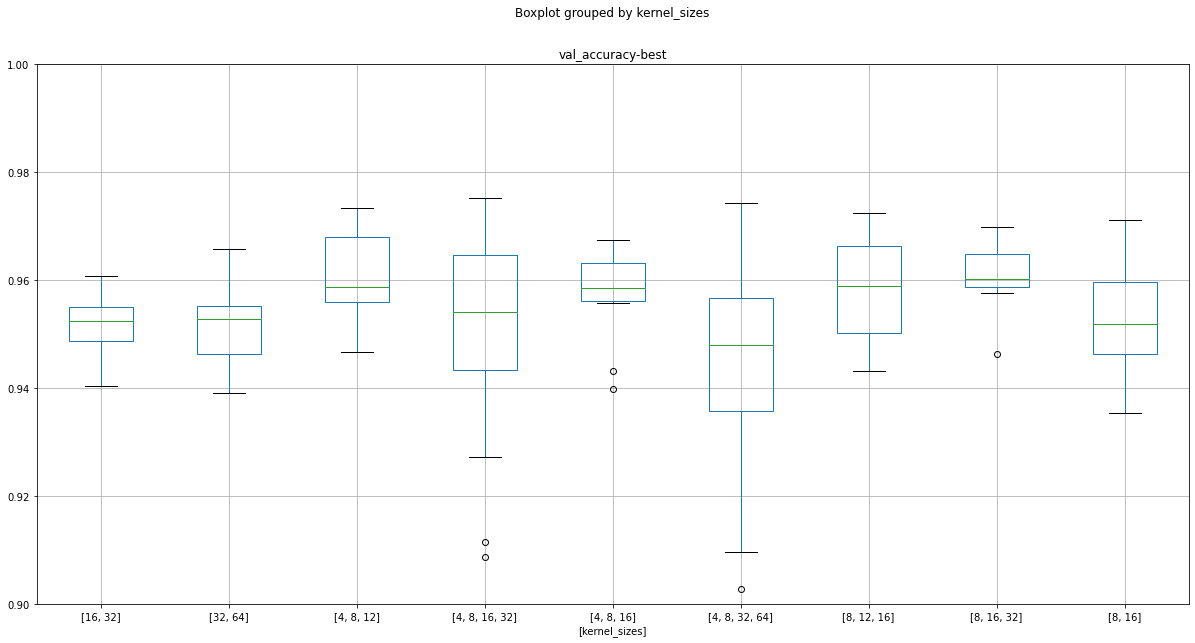

In [7]:
ax = df.boxplot(column=["val_accuracy-best"], by=['kernel_sizes'], figsize=(20,10), return_type='axes' )
ax.values[0].set_ylim([0.9, 1.0])  # Needed to eliminate a far outlier at <0.25 accuracy

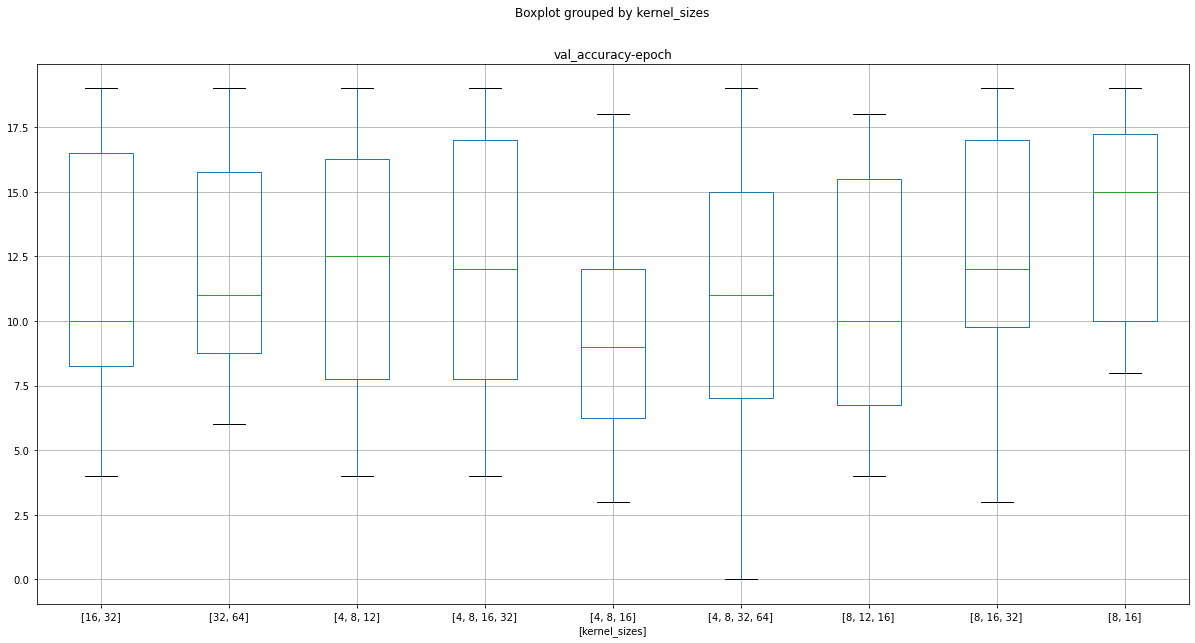

In [8]:
boxplot = df.boxplot(column=["val_accuracy-epoch"], by=['kernel_sizes'], figsize=(20,10))


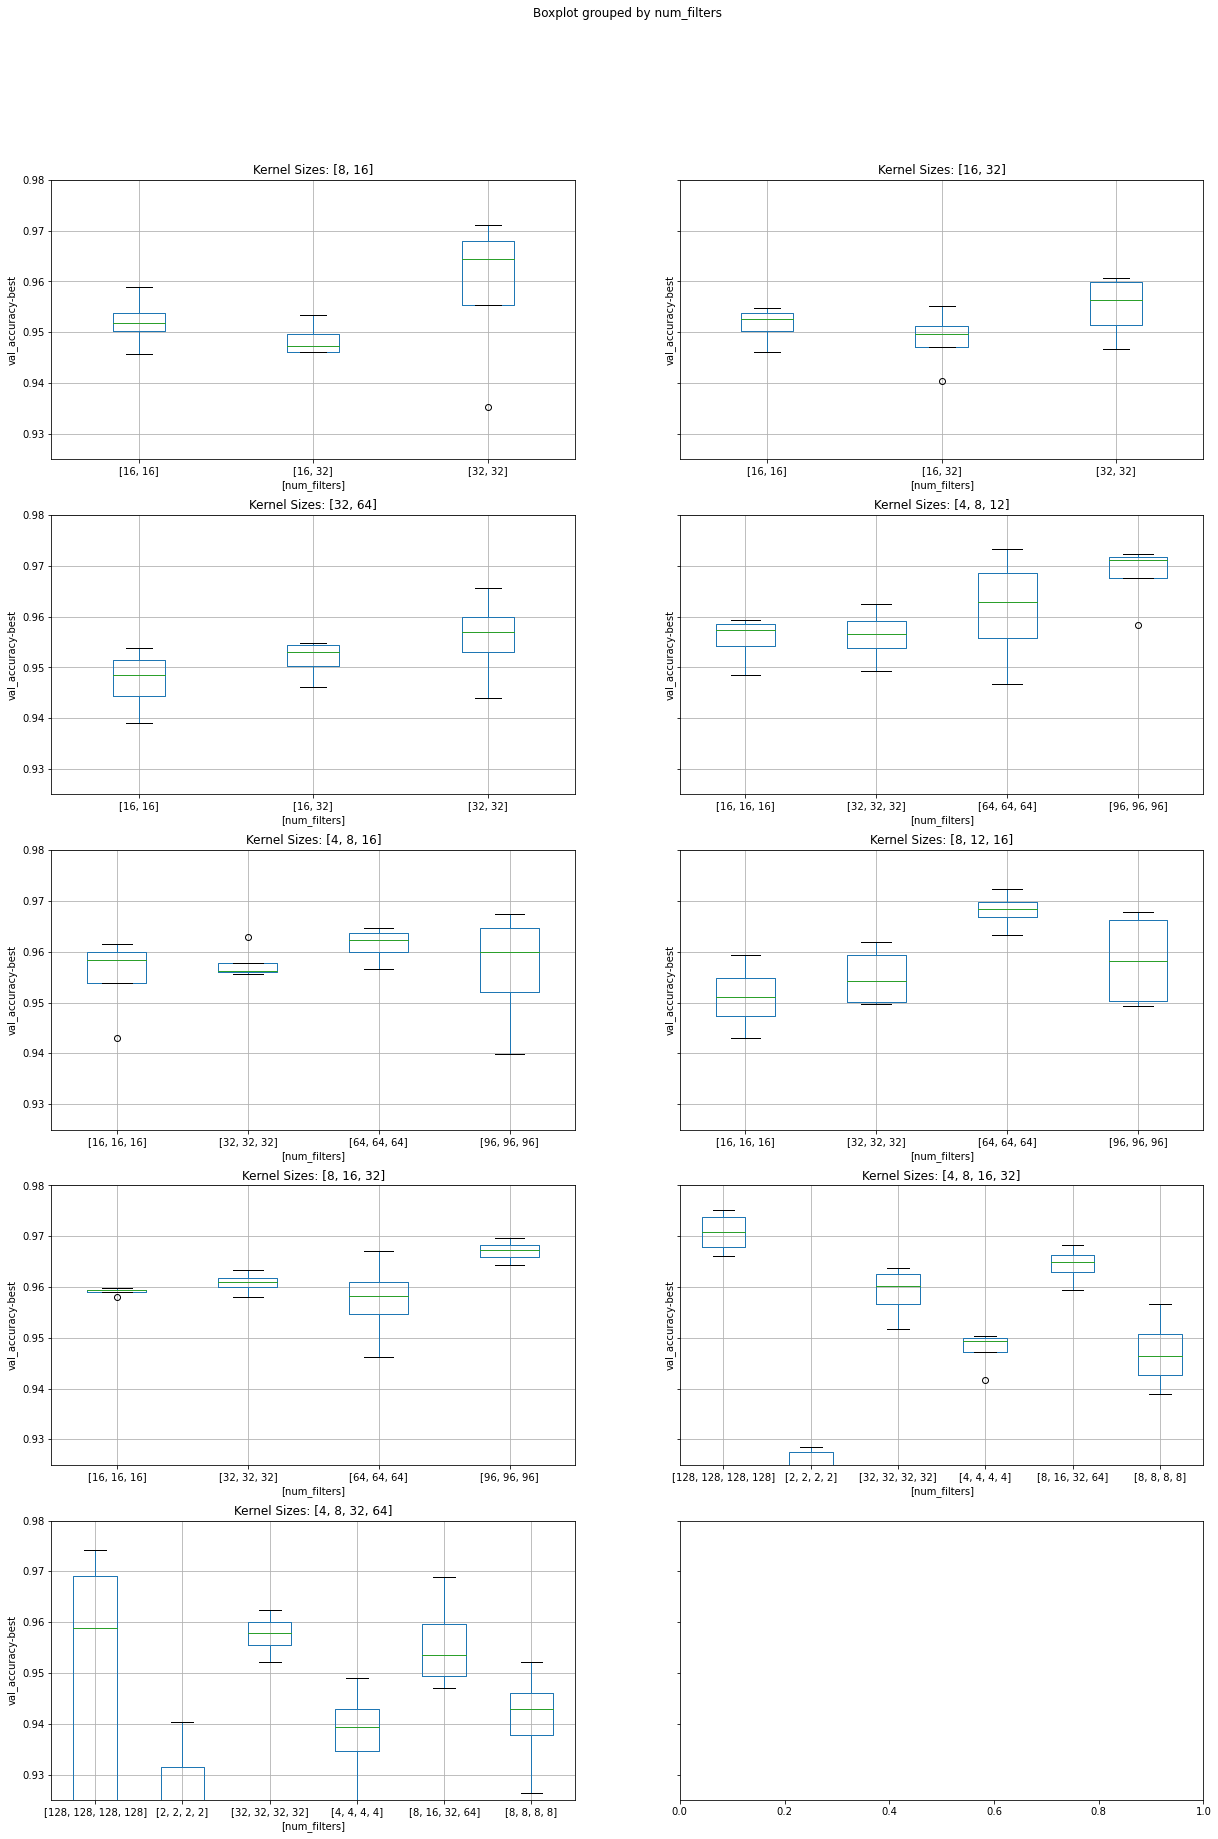

In [9]:
# look at each set of kernel sizes by their counts

kernels = df.kernel_sizes.unique()

# create 3-wide subplots to show
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 30), sharey=True)

for i in range(0,len(kernels)):
      
    x = i // 2
    y = i % 2
    
    axis = ax[x,y]
    
    axis.set_ylabel("val_accuracy-best")
    axis.set_ylim(0.925,0.98)  # will not include a few outliers on one model

    # plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    boxplot = df[df.kernel_sizes == kernels[i]].boxplot(column=["val_accuracy-best"],
                                                          by=['num_filters'],
                                                          ax=axis,
                                                          figsize=(20,10))
    axis.title.set_text(f"Kernel Sizes: {kernels[i]}")


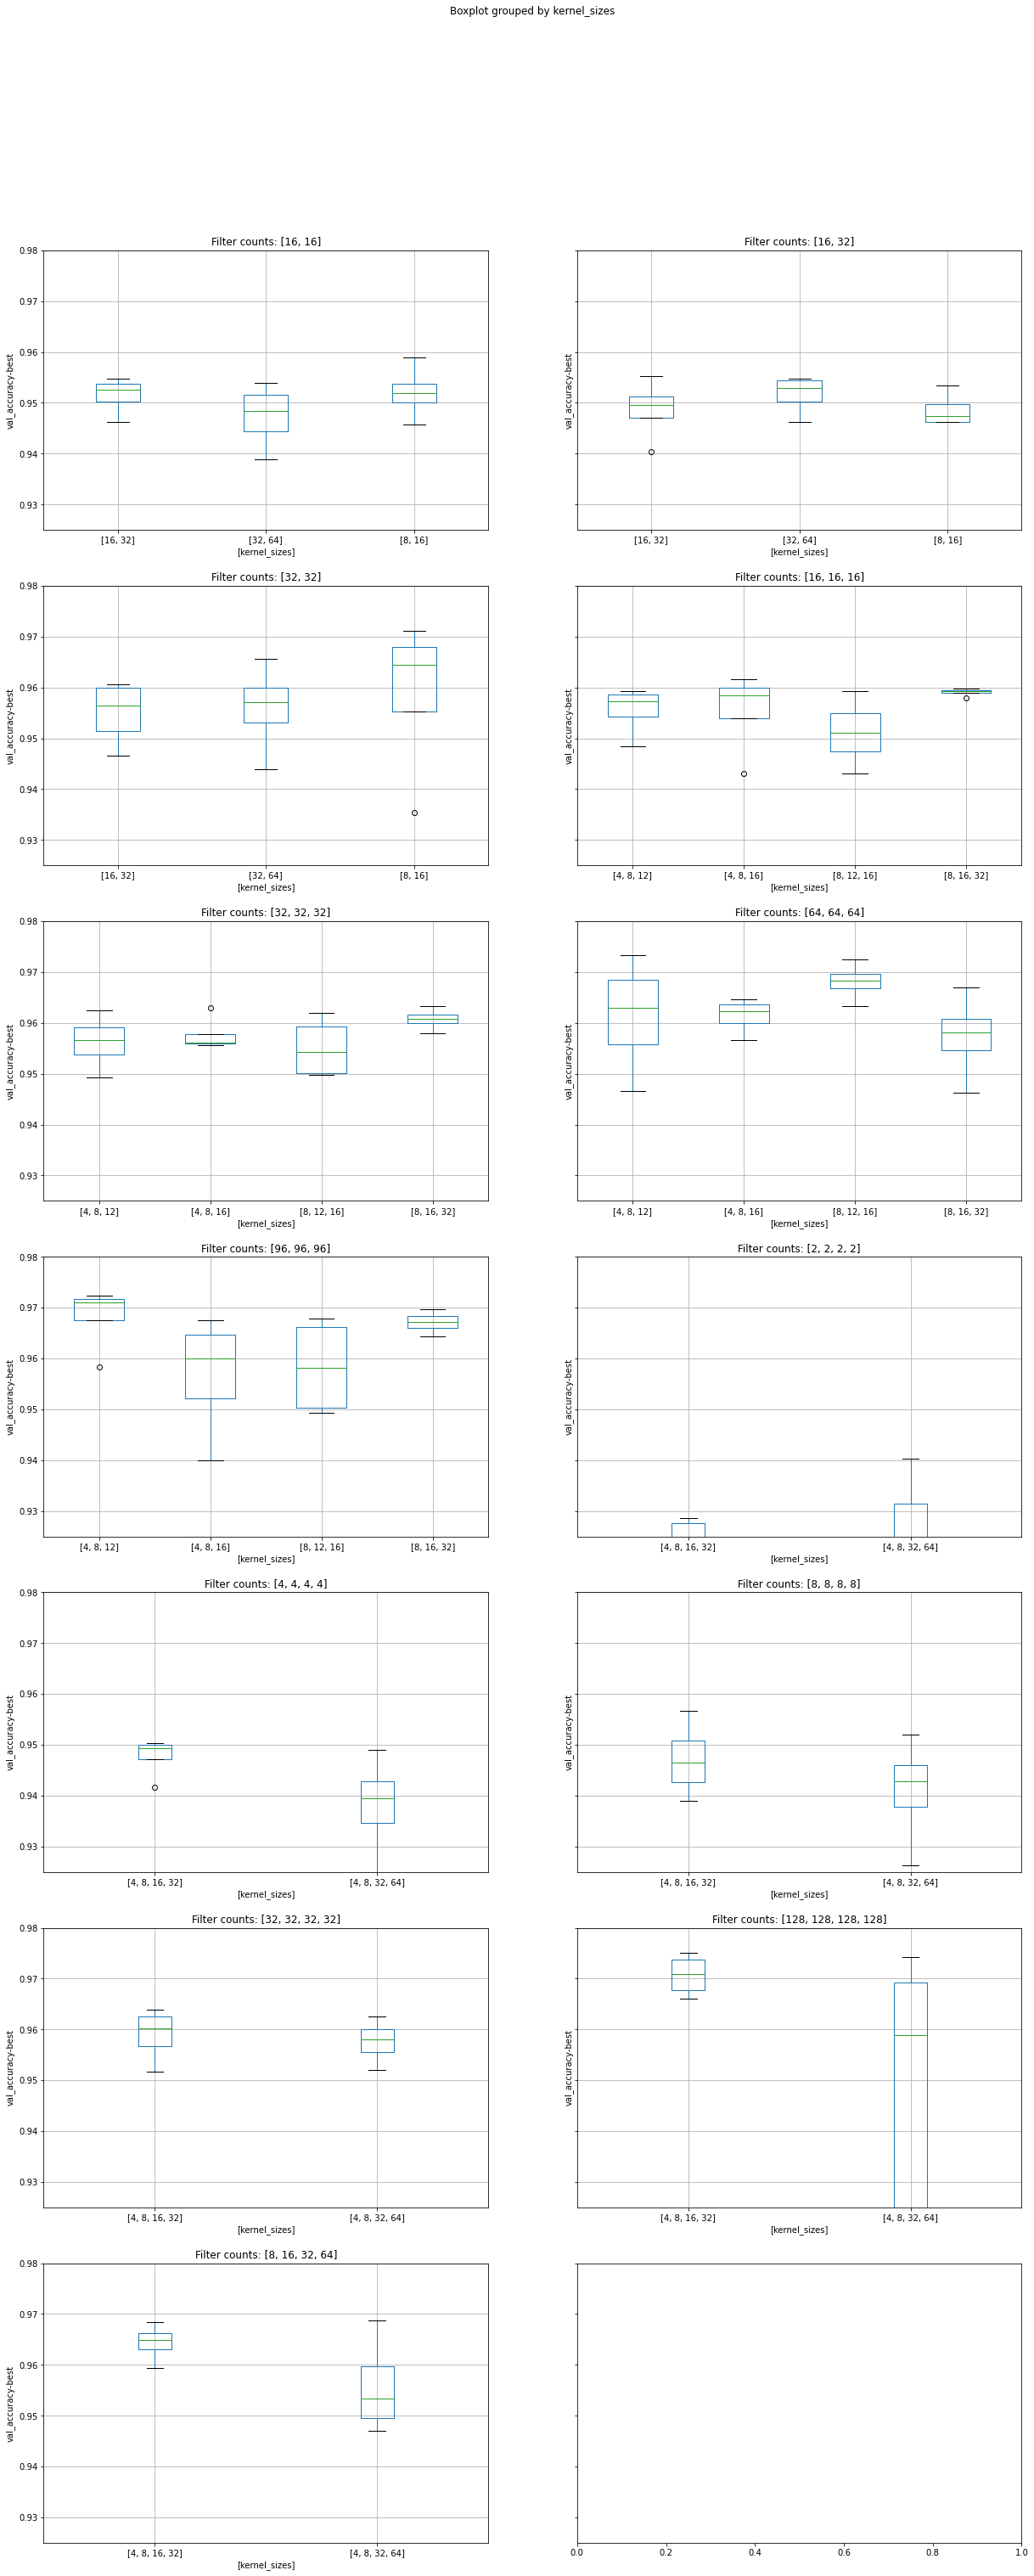

In [10]:
# look at each set of filter counts by their kernel sizes

filters = df.num_filters.unique()

# create 3-wide subplots to show
# fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(20, 50), sharey=True)
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(20, 50), sharey=True)

for i in range(0,len(filters)):
      
    x = i // 2
    y = i % 2
    
    axis = ax[x,y]
    
    axis.set_ylabel("val_accuracy-best")
    axis.set_ylim(0.925,0.98)  # will not include a few outliers on one model


    # plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    boxplot = df[df.num_filters == filters[i]].boxplot(column=["val_accuracy-best"],
                                                          by=['kernel_sizes'],
                                                          ax=axis,
                                                          figsize=(20,10))
    axis.title.set_text(f"Filter counts: {filters[i]}")


**In all of the cases we tried, the best accuracies came from the highest number of filters for each set of kernels, regardless of the kernel sizes:** ```[16,32]``` for the two-filter convolutions and ```[8,16,32]``` for the three-filter ones. We should therefore test even higher counts to see if that makes any marginal improvement, including ```[32,64]``` for the two-filter convolutions, and ```[16,32,63]``` for the three-filter ones.

**Equally, the largest filters generally produce the best results,** though there seems to be some fall off between ```[4,9,12]``` and ```[8,12,16]``` suggesting that a 4-word kernel does have value.  We should, in addition, test [4,8,16], [4,8,16,32] and other similar combinations to see if we can improve further.

## Evaluate the Dense Layers
Look at differences in the fully connected layers within the beset selections so far.

(0.925, 0.98)

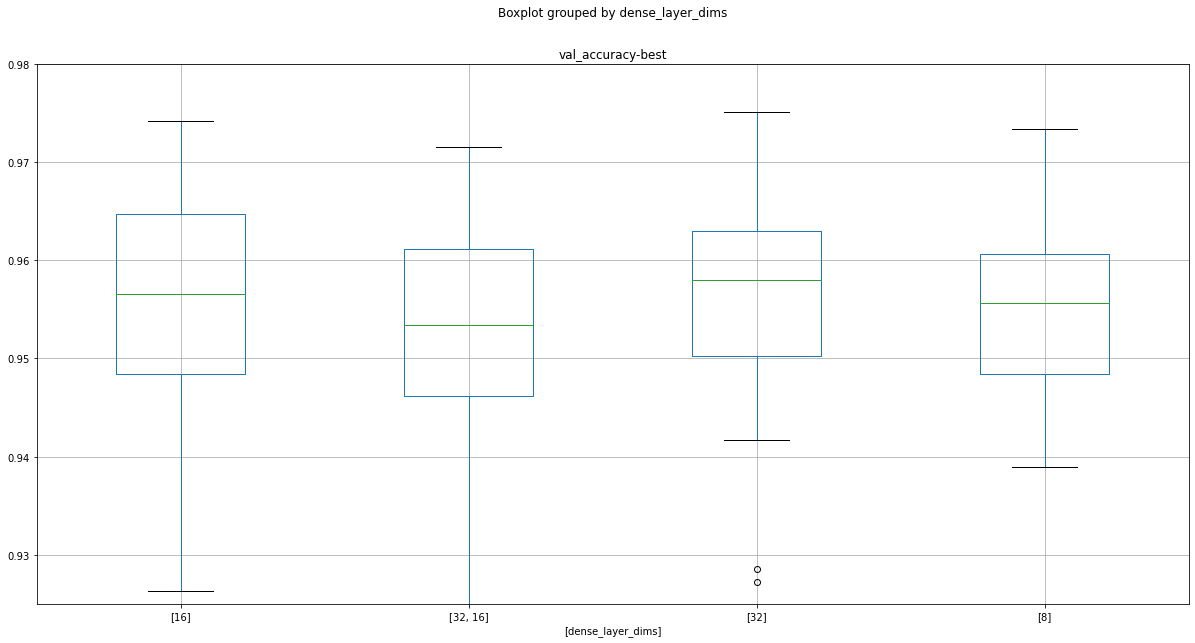

In [11]:
# look at accuracy by dense layers

ax = df.boxplot(column=["val_accuracy-best"], by=['dense_layer_dims'], figsize=(20,10))
ax.set_ylim(0.925,0.98)  # will not include a few outliers on one model




After selecting the best from the rest of the hyperparameters, the dense layers appear to have less of an effect (averages are within 1% of accuracy)